# CSE514 - Project
## Data Night at the MET: Exploratory Data Analysis



In [2]:
import data_cleaning
from importlib import reload

reload(data_cleaning)

<module 'data_cleaning' from '/content/data_cleaning.py'>

In [3]:
artwork, artist, medium = data_cleaning.load_data()

  0%|          | 0/477804 [00:00<?, ?it/s]

  0%|          | 0/477804 [00:00<?, ?it/s]

### Number of Artworks per Department

In [84]:
import plotly.express as px
import pandas as pd
import numpy as np
import wordcloud as wc
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import numpy as np

departments = pd.DataFrame(artwork.Department.value_counts()).reset_index()

fig = px.bar(departments[0:10], 
             y='index', 
             x='Department',
             color='index',
             title="Number of Artworks per Department",
             labels={
                     "index": "Department",
                     "Department": "Count",},
             width=800,
             height=600,
             color_discrete_sequence=px.colors.qualitative.Antique
             )

fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  showlegend=False)
fig.show()

### Number of Artists per Culture

In [86]:
artwork['NumArtists'] = artwork['Artist IDs'].dropna().apply(len)
artists_by_dept = pd.DataFrame(artwork.groupby('Culture')['NumArtists'].sum()).sort_values('NumArtists', ascending=False).reset_index()
fig = px.bar(artists_by_dept[0:10], 
             y='Culture', 
             x='NumArtists', 
             title='Number of Artists per Culture',
             labels={"NumArtists": "Number of Artists",},
             width=800,
             height=600,
             color='Culture',
             color_discrete_sequence=px.colors.qualitative.Antique)

fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
plot_bgcolor='rgba(0,0,0,0)',
showlegend=False)

fig.show()

### Artwork Mediums WordCloud

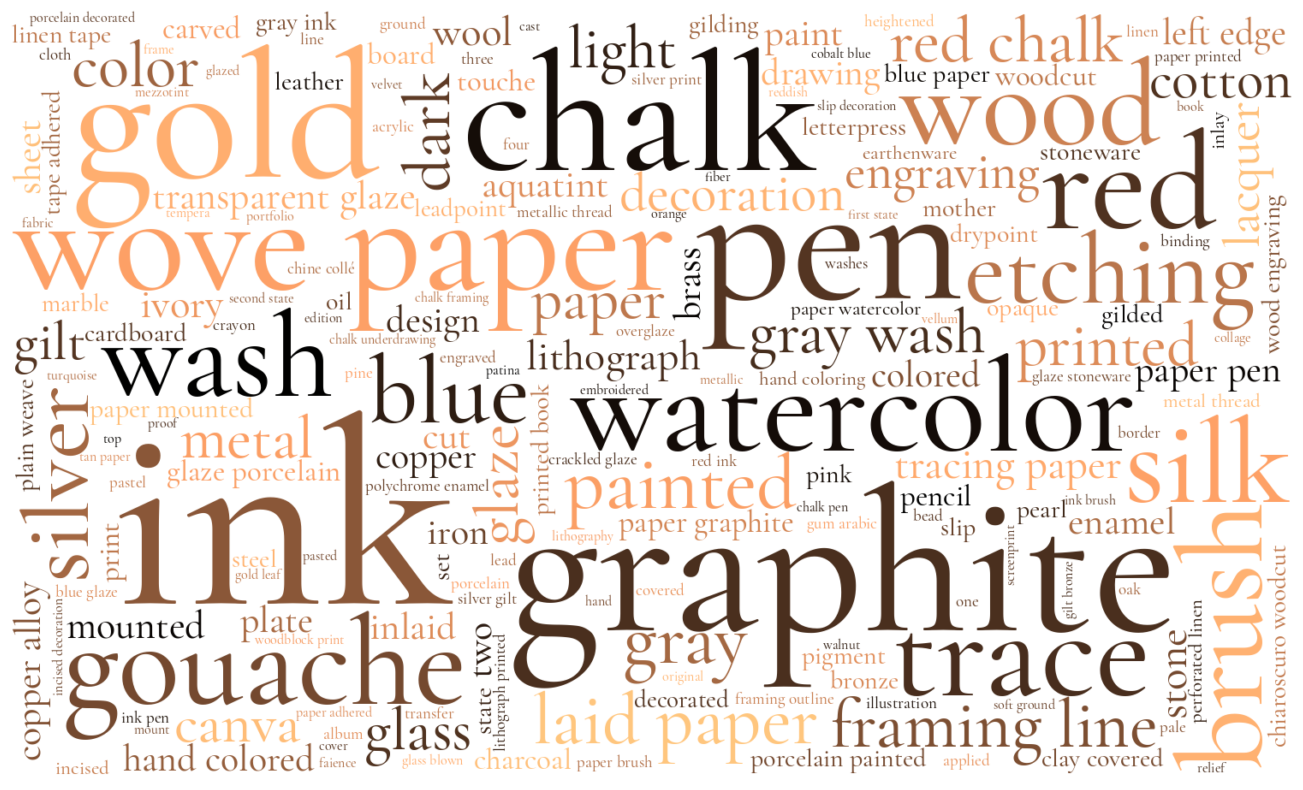

In [36]:
material = medium['Material'].dropna().tolist()
material = ' '.join(material).lower()

wordcloud = wc.WordCloud(stopwords = list(wc.STOPWORDS) + ['black', 'white', 'green', 'yellow', 'brown'],
                      collocations=True,
                      background_color='white',
                      min_word_length=1,
                      colormap='copper',
                      font_path = '/content/CormorantGaramond-Medium.ttf',
                      width=1500, 
                      height=900).generate(material)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()